Install necessary packages

In [1]:
!pip install scikit-learn statsmodels

Load Libraries and Data

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.api import OLS
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

In [6]:
# Load California Housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

In [32]:
# Add the target variable 'Price' to the DataFrame
X['Price'] = california.target

# Display the first few rows of the dataset
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [33]:
# Display basic information about the dataset
print(X.info())

# Show descriptive statistics
X.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


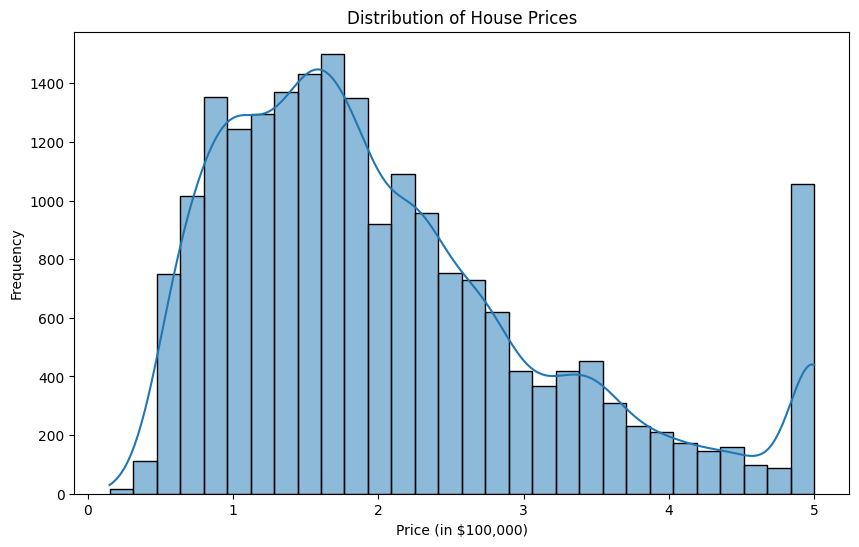

In [35]:
# Plot the distribution of the target variable (Price)
plt.figure(figsize=(10, 6))
sns.histplot(X['Price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price (in $100,000)')
plt.ylabel('Frequency')
plt.show()

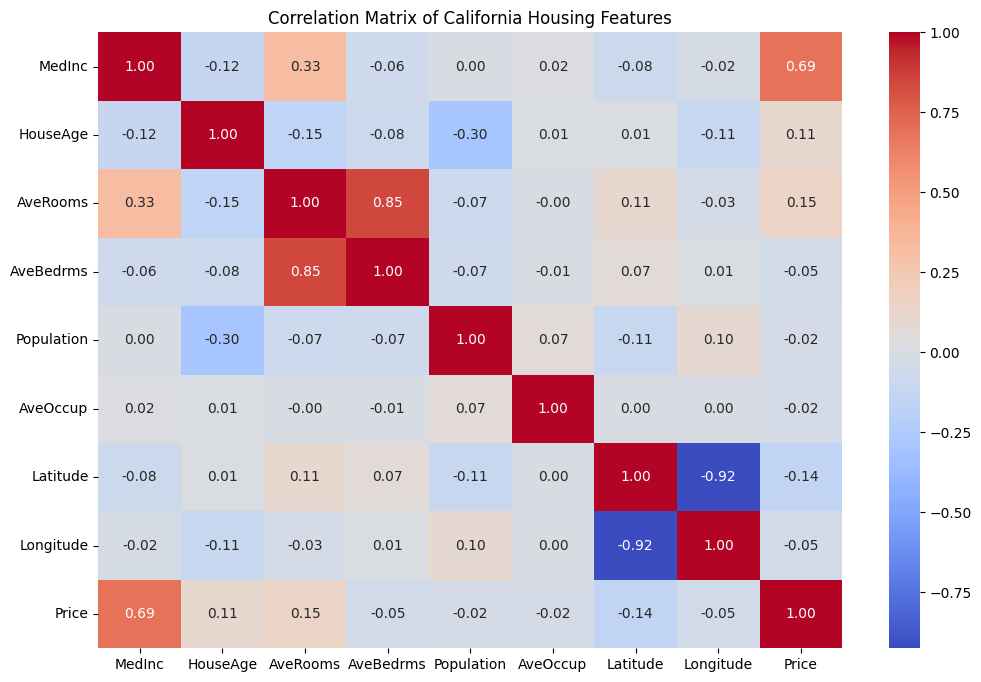

In [37]:
# Calculate the correlation matrix
corr_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of California Housing Features')
plt.show()

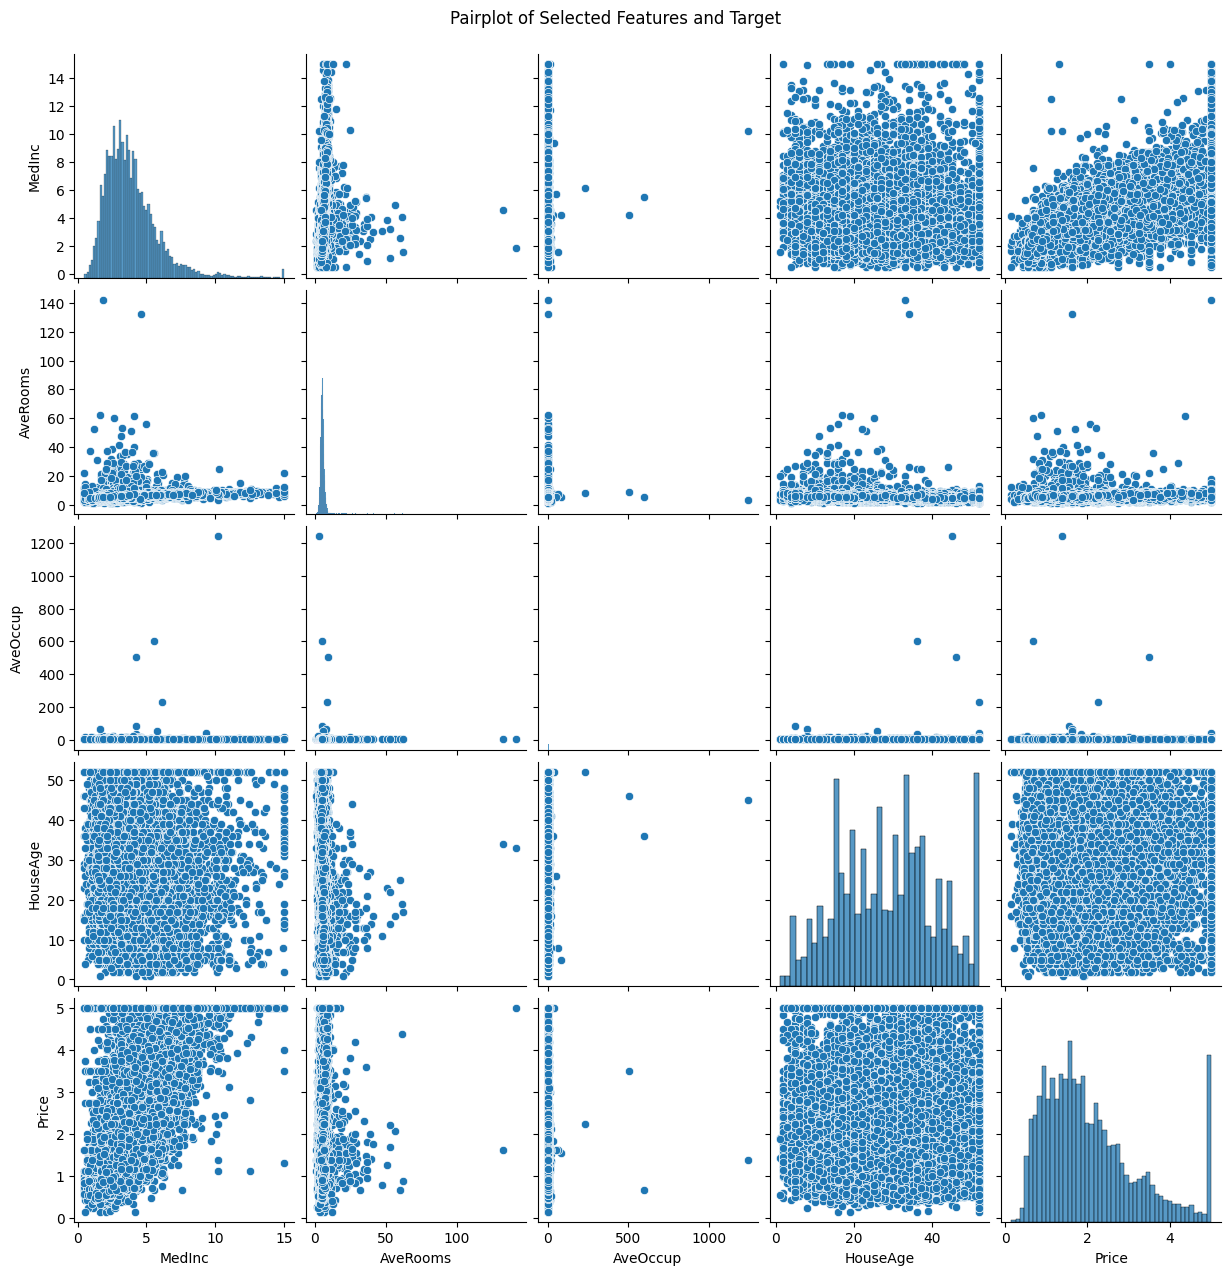

In [38]:
# Create a pairplot for a subset of features and target variable
sns.pairplot(X[['MedInc', 'AveRooms', 'AveOccup', 'HouseAge', 'Price']])
plt.suptitle('Pairplot of Selected Features and Target', y=1.02)
plt.show()

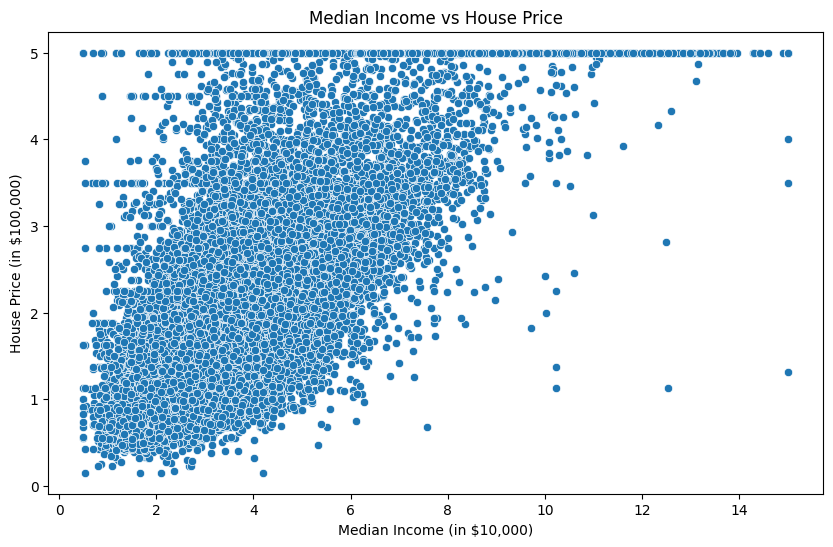

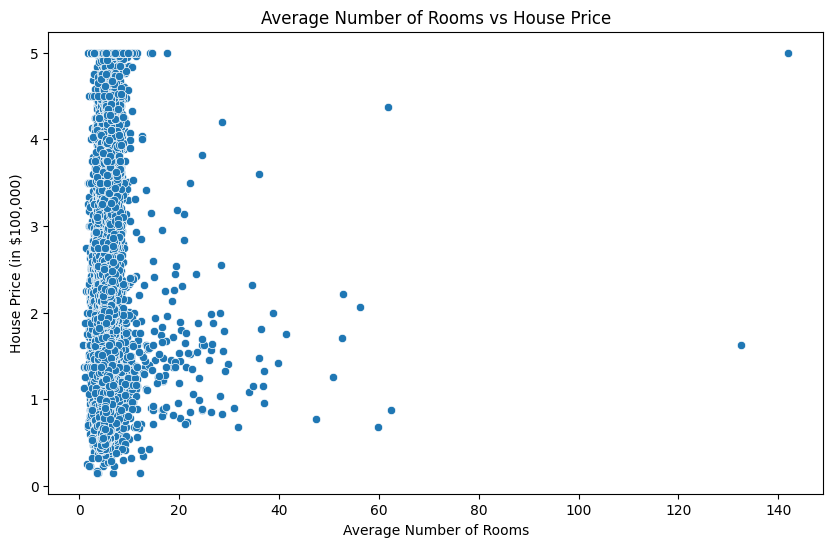

In [40]:
# Scatter plot for Median Income vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedInc', y='Price', data=X)
plt.title('Median Income vs House Price')
plt.xlabel('Median Income (in $10,000)')
plt.ylabel('House Price (in $100,000)')
plt.show()

# Scatter plot for Average Number of Rooms vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AveRooms', y='Price', data=X)
plt.title('Average Number of Rooms vs House Price')
plt.xlabel('Average Number of Rooms')
plt.ylabel('House Price (in $100,000)')
plt.show()

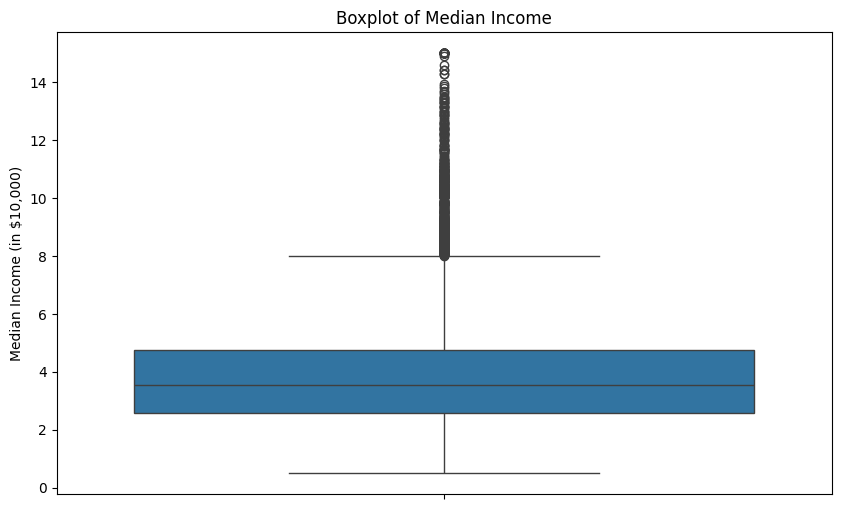

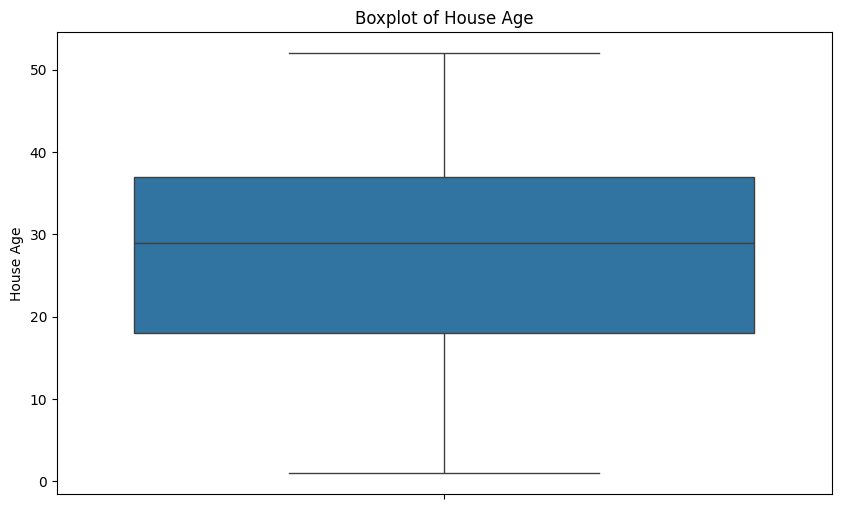

In [43]:
# Boxplot for Median Income
plt.figure(figsize=(10, 6))
sns.boxplot(y='MedInc', data=X)
plt.title('Boxplot of Median Income')
plt.ylabel('Median Income (in $10,000)')
plt.show()

# Boxplot for House Age
plt.figure(figsize=(10, 6))
sns.boxplot(y='HouseAge', data=X)
plt.title('Boxplot of House Age')
plt.ylabel('House Age')
plt.show()

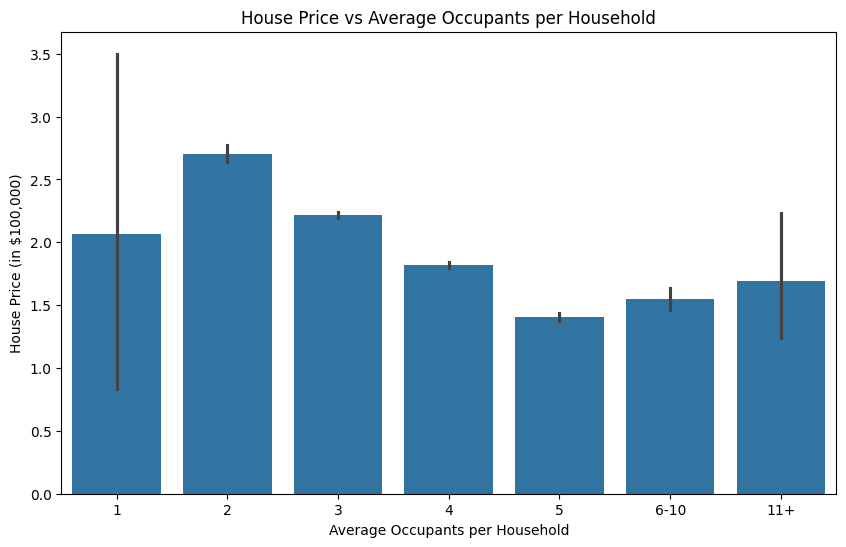

In [44]:
# Bar plot for the Average Occupants per Household (binned)
X['AveOccup_binned'] = pd.cut(X['AveOccup'], bins=[0, 1, 2, 3, 4, 5, 10, 20], labels=['1', '2', '3', '4', '5', '6-10', '11+'])

plt.figure(figsize=(10, 6))
sns.barplot(x='AveOccup_binned', y='Price', data=X)
plt.title('House Price vs Average Occupants per Household')
plt.xlabel('Average Occupants per Household')
plt.ylabel('House Price (in $100,000)')
plt.show()

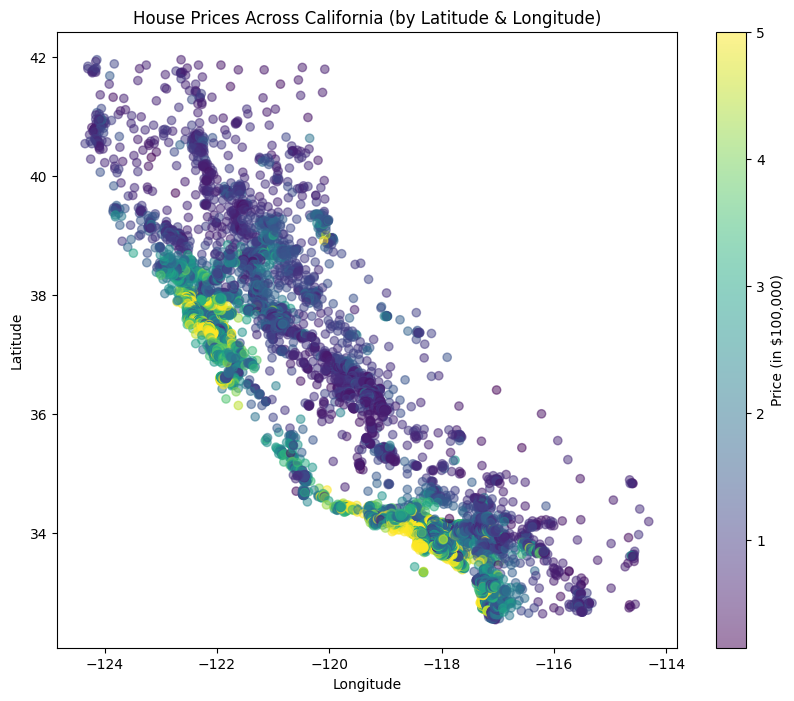

In [46]:
# Scatter plot for Latitude and Longitude colored by Price
plt.figure(figsize=(10, 8))
plt.scatter(X['Longitude'], X['Latitude'], c=X['Price'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Price (in $100,000)')
plt.title('House Prices Across California (by Latitude & Longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [49]:
# Load California Housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

In [50]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

In [51]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Feature Selection Methods

Forward Stepwise Selection

In [52]:
# Forward Stepwise Selection using SequentialFeatureSelector
lin_reg = LinearRegression()

In [53]:
# Forward Selection
sfs_forward = SFS(lin_reg,
                  k_features='best',
                  forward=True,
                  floating=False,
                  scoring='r2',
                  cv=5)
sfs_forward = sfs_forward.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be

In [54]:
# Selected features
selected_features_forward = list(sfs_forward.k_feature_names_)
print("Forward Stepwise Selection Features: ", selected_features_forward)

Forward Stepwise Selection Features:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']


Backward Stepwise Selection

In [55]:
# Backward Selection
sfs_backward = SFS(lin_reg,
                   k_features='best',
                   forward=False,
                   floating=False,
                   scoring='r2',
                   cv=5)
sfs_backward = sfs_backward.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be

In [56]:
# Selected features
selected_features_backward = list(sfs_backward.k_feature_names_)
print("Backward Stepwise Selection Features: ", selected_features_backward)

Backward Stepwise Selection Features:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']


Forward Stagewise Selection

Forward Stagewise Selection is similar to forward stepwise, but with simpler decisions.
We'll use an approach with a regularized linear model for illustrative purposes.

In [57]:
# Using Lasso to simulate forward stagewise selection
lasso_stagewise = Lasso(alpha=0.01, max_iter=1000)
lasso_stagewise.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

In [58]:
# Selected features (non-zero coefficients)
selected_features_stagewise = np.where(lasso_stagewise.coef_ != 0)[0]
print("Forward Stagewise Selection Features: ", X.columns[selected_features_stagewise])

Forward Stagewise Selection Features:  Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude',
       'Longitude'],
      dtype='object')


#Feature Extraction Methods

Principal Component Analysis (PCA)

In [59]:
# PCA (Principal Component Analysis)
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained Variance Ratios of PCA: ", pca.explained_variance_ratio_)

Explained Variance Ratios of PCA:  [0.25313826 0.23403182 0.15917174 0.12976895 0.12547205]


Ridge and Lasso Regularization

In [60]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

In [61]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

In [62]:
print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Lasso Regression MSE: {mse_lasso}")

Ridge Regression MSE: 0.5558548589435971
Lasso Regression MSE: 0.6796290284328825


Visualization and Model Performance Comparison

In [63]:
# Calculate R-squared for each model
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [64]:
# Plot comparison of MSE and R^2 scores
mse_values = [mse_ridge, mse_lasso]
r2_values = [r2_ridge, r2_lasso]
labels = ['Ridge', 'Lasso']

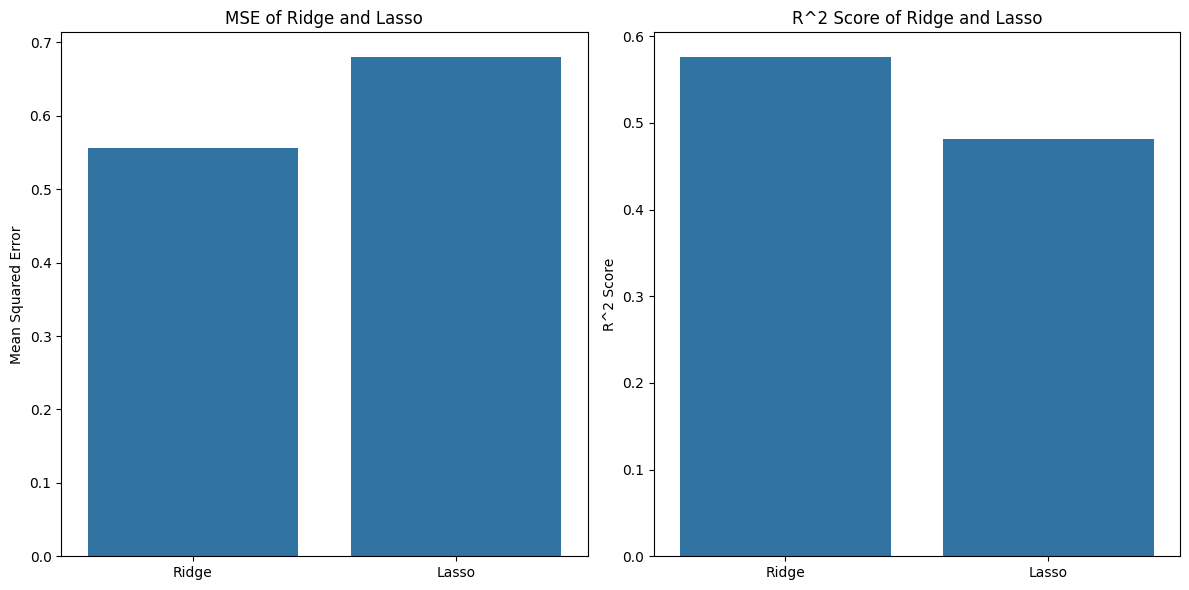

In [65]:
# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(x=labels, y=mse_values, ax=ax[0])
ax[0].set_title('MSE of Ridge and Lasso')
ax[0].set_ylabel('Mean Squared Error')

sns.barplot(x=labels, y=r2_values, ax=ax[1])
ax[1].set_title('R^2 Score of Ridge and Lasso')
ax[1].set_ylabel('R^2 Score')

plt.tight_layout()
plt.show()

Final Comparison of all Models

In [66]:
# Train a Linear Regression model on PCA-reduced data
lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train_pca, y_train)

LinearRegression()

In [67]:
# Predict on PCA-transformed test set
y_pred_pca = lin_reg_pca.predict(X_test_pca)

In [68]:
# Calculate the MSE and R-squared for PCA
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

In [69]:
# Print the values for PCA
print(f"PCA Regression MSE: {mse_pca}")
print(f"PCA Regression R^2: {r2_pca}")

PCA Regression MSE: 0.7431025684653448
PCA Regression R^2: 0.432923170701341


In [70]:
# Model performance comparison
models = ['PCA', 'Ridge', 'Lasso']
mse_values = [mse_pca, mse_ridge, mse_lasso]
r2_values = [r2_pca, r2_ridge, r2_lasso]

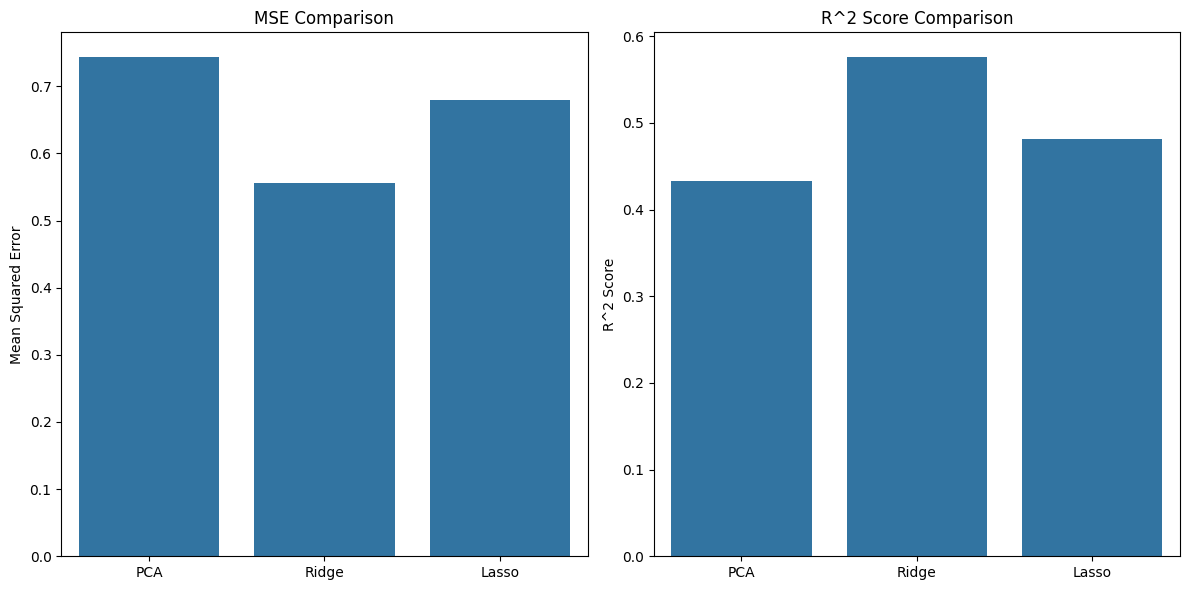

In [71]:
# Final comparison visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot MSE comparison
sns.barplot(x=models, y=mse_values, ax=ax[0])
ax[0].set_title('MSE Comparison')
ax[0].set_ylabel('Mean Squared Error')

# Plot R^2 comparison
sns.barplot(x=models, y=r2_values, ax=ax[1])
ax[1].set_title('R^2 Score Comparison')
ax[1].set_ylabel('R^2 Score')

plt.tight_layout()
plt.show()